In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
try:
    import nltk
except:
    !pip install nltk
from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pothulas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\pothulas\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
os.chdir(r'\\SRVA\Homes$\pothulas\Desktop\DataMining\Project')
df =pd.read_csv('Tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [5]:
df.shape

(14640, 15)

In [6]:
cols = ['tweet_id','negativereason_confidence','tweet_created','airline_sentiment_confidence','negativereason','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord']
df1 = df.drop(cols, axis=1)

In [7]:
df1.sample(5)

,airline_sentiment,airline,text,tweet_location,user_timezone
13336,negative,American,@AmericanAir flight US1562 from RIC2DFW was Ca...,"Richmond, VA",Central Time (US & Canada)
8229,negative,Delta,@JetBlue it is absurd that I have waited more ...,Miami | Puerto Rico,NaN
8459,positive,Delta,"@JetBlue btw, her name was Samantha and she wo...",NaN,Eastern Time (US & Canada)
3944,negative,United,@united are my bags here yet? They were at Pa...,All Over The World,NaN
7359,negative,Delta,@JetBlue how about free wifi on flt 1254 out o...,NaN,Atlantic Time (Canada)


In [8]:
df1['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
df1['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
df['text'][9]

"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."

In [11]:
import re
import string
def cleaning(tweet):
  cleanr = re.compile('<.*?>')      # logic: Removing HTML tags by using regular expressions
  clean1 = re.sub(cleanr, '', tweet)
  clean2 = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', "", clean1)  #Removing Url('.' with continous string on eitherside if present is removed )
  clean3 = str(clean2).replace('\xa0',' ')
  clean4 = str(clean3).lower()              # converting all tweets to lower case to create uniformity for model fitting of words
  translation = str.maketrans('', '', string.punctuation)
  clean5 = clean4.translate(translation)        # Removing all special characters
  clean6 = clean5.replace('…', ' ')
  return clean6

In [12]:
stop=pd.read_csv("stop_words.txt", header=None)
stop = set(stop[0])

In [13]:
df1['text'] = df1.text.apply(lambda x: cleaning(x))

In [14]:
from nltk.tokenize import word_tokenize
df1['text'] = df1.text.apply(lambda x: word_tokenize(x))

In [15]:
df1.text = df1['text'].apply(lambda x: [word for word in x if word not in stop])

In [16]:
df['text'][4785]

'@SouthwestAir #DestinationDragons @Imaginedragons Scavenger Hunt Vegas, BE READY!!! http://t.co/vHgkiTzSaw'

In [17]:
df['text'][4255]

'@united Is there a direct number to call to request a refund?  Its telling me its not valid as I changed the ticket.  No number on site'

In [18]:
df1['text'][4255]

['direct',
 'number',
 'call',
 'request',
 'refund',
 'telling',
 'valid',
 'changed',
 'ticket',
 'number',
 'site']

In [19]:
import seaborn as sns

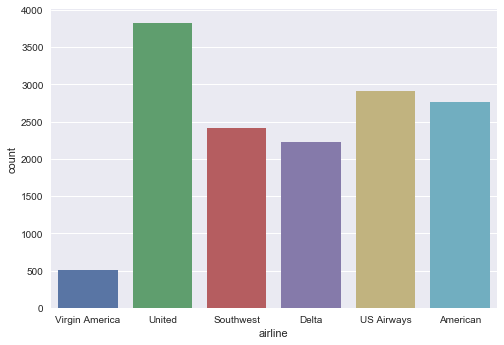

In [20]:
sns.countplot(x ='airline', data = df1)
plt.show()

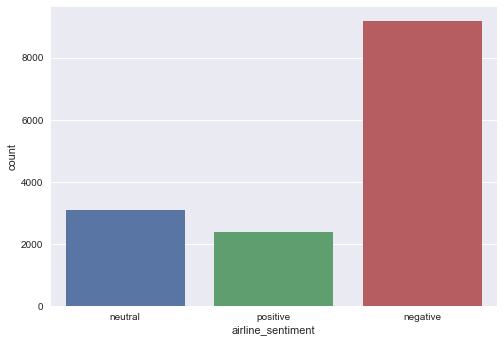

In [21]:
sns.countplot(x ='airline_sentiment', data = df1)
plt.show()

In [75]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

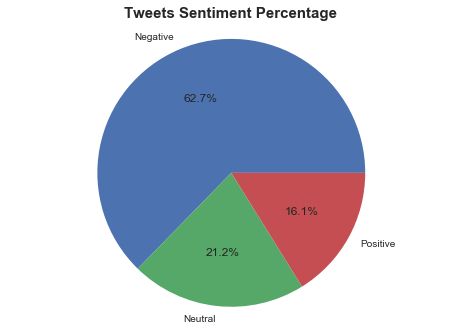

In [76]:
x = df['airline_sentiment'].value_counts()
x.tolist()
Tweet_Sentiment = ['Negative', 'Neutral','Positive']
piechart = plt.pie(x,  labels = Tweet_Sentiment, autopct = '%1.1f%%')
plt.title('Tweets Sentiment Percentage', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

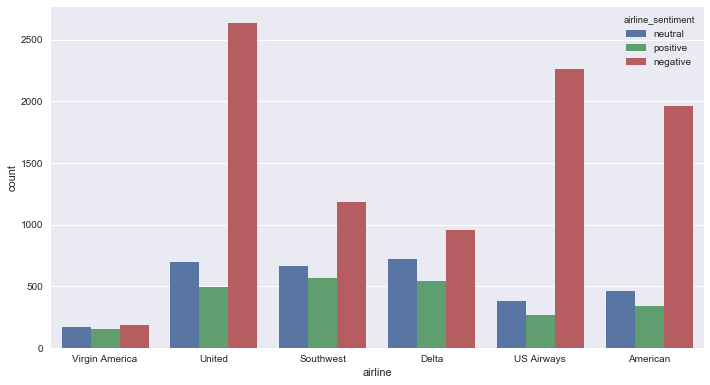

In [24]:
a4_dims = (11.7, 6.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='airline', hue="airline_sentiment", data=df1)
plt.show()

In [25]:
from nltk.tokenize.moses import MosesDetokenizer          # Detokenizing the tweets back to string using Mosesdetokenizer
detokenizer = MosesDetokenizer()
df1.text = df1.text.apply(lambda x: detokenizer.detokenize(x, return_str=True))

In [26]:
df1.head()

,airline_sentiment,airline,text,tweet_location,user_timezone
0,neutral,Virgin America,,NaN,Eastern Time (US & Canada)
1,positive,Virgin America,youve commercials experience tacky,NaN,Pacific Time (US & Canada)
2,neutral,Virgin America,didnt today trip,Lets Play,Central Time (US & Canada)
3,negative,Virgin America,aggressive blast obnoxious entertainment guest...,NaN,Pacific Time (US & Canada)
4,negative,Virgin America,big bad thing,NaN,Pacific Time (US & Canada)


In [27]:
string = []
l = df1.text.apply(lambda x: string.extend([x]))

In [28]:
all_tweets_string = ' '.join(str(e) for e in string)

In [29]:
f = open('all_tweets_string.txt','w')
f.write(all_tweets_string)
f.close()

In [30]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

#### For Plotting Word clouds - Data of different Airlines seperated

In [32]:
string = []
l = df_United.text.apply(lambda x: string.extend([x]))
United_tweets_string = ' '.join(str(e) for e in string)
f = open('United_tweets_string.txt','w')
f.write(United_tweets_string)
f.close()

In [33]:
string = []
l = df_US_Airways.text.apply(lambda x: string.extend([x]))
USairways_tweets_string = ' '.join(str(e) for e in string)
f = open('USairways_tweets_string.txt','w')
f.write(USairways_tweets_string)
f.close()

#### Dividing into Testing & Training sets:

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['text'], df1['airline_sentiment'], test_size =0.3)

In [175]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [204]:
y_test.value_counts()

negative    2823
neutral      875
positive     694
Name: airline_sentiment, dtype: int64

#### Model Implementation:

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score      # Importing Cross Validation from sklearn
count_vect = CountVectorizer()

In [177]:
X_train = X_train['text'].astype(str).values.tolist()
X_test = X_test['text'].astype(str).values.tolist()

In [178]:
z = count_vect.fit_transform(X_train)

In [179]:
w = count_vect.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression      # Importing Logistic Regression Function
from sklearn import metrics

In [191]:
start = time.time()              # Time function used to evaluate the execution run time for training logistic model

logreg =  LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs',C = 0.5125)

logreg_scores = cross_val_score(logreg, X1,y, cv=10, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

end = time.time()
logreg_time = (end - start)/60    # Time converted to Minutes
logreg_time

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.695500045828


0.17950701316197712

In [164]:
start_time = time.time()

logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs',random_state=0)
param_grid = {'C':np.linspace(0.1,10, 25)}

grid = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid.fit(X1, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'C': 0.51250000000000007}

Scores on training set:
0.683 (+/-0.072) for {'C': 0.10000000000000001}
0.695 (+/-0.068) for {'C': 0.51250000000000007}
0.693 (+/-0.066) for {'C': 0.92500000000000004}
0.693 (+/-0.065) for {'C': 1.3375000000000001}
0.693 (+/-0.064) for {'C': 1.7500000000000002}
0.692 (+/-0.065) for {'C': 2.1625000000000001}
0.692 (+/-0.066) for {'C': 2.5750000000000002}
0.691 (+/-0.064) for {'C': 2.9875000000000003}
0.690 (+/-0.065) for {'C': 3.4000000000000004}
0.690 (+/-0.066) for {'C': 3.8125000000000004}
0.689 (+/-0.065) for {'C': 4.2249999999999996}
0.689 (+/-0.065) for {'C': 4.6375000000000002}
0.688 (+/-0.064) for {'C': 5.0499999999999998}
0.688 (+/-0.064) for {'C': 5.4625000000000004}
0.687 (+/-0.064) for {'C': 5.875}
0.687 (+/-0.065) for {'C': 6.2875000000000005}
0.686 (+/-0.062) for {'C': 6.7000000000000002}
0.686 (+/-0.064) for {'C': 7.1124999999999998}
0.685 (+/-0.062) for {'C': 7.5250000000000004}
0.685 (+/-0.063) for {'C': 7.9375}


In [57]:
logreg.fit(z, y_train.values.ravel())
logreg_accuracy = logreg.score(w, y_test)*100    # Accuracy of the Logistic Regression Model on the test set
logreg_accuracy

70.651183970856096

In [86]:
from sklearn.cross_validation import cross_val_score      # Importing Cross Validation from sklearn

X1 =df1['text'].astype(str).values.tolist()
X1 = count_vect.transform(X1)
y = df1['airline_sentiment']

Log_reg_cross_val = (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
Log_reg_cross_val*100                                      # Finding the mean accuracy of 10 cases

59.638574393140409

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer   # Importing TfidfVectorizer
Tfid_vect = TfidfVectorizer(min_df=1,max_features = 100)

X2 =df1['text'].astype(str).values.tolist()            # Fitting or transforming text data to Tfidf Vectorizer
X2 = Tfid_vect.fit_transform(X2)
y = df1['airline_sentiment']

Log_reg_Tfid_cross_val = (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(Log_reg_Tfid_cross_val*100)                                                     

59.6385743931


In [61]:
## Printing first 25 original and predicted classes for the tweets
print('True:', y_test.values[0:25])
#print('False:', y_pred_class[0:25])

True: ['negative' 'negative' 'neutral' 'negative' 'negative' 'positive'
 'negative' 'negative' 'neutral' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'neutral'
 'positive' 'negative' 'neutral' 'negative' 'neutral' 'negative' 'positive']


In [197]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [198]:
start_forest = time.time()

forest_scores = cross_val_score(forest, X1, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))

end_forest = time.time()
forest_time = (end_forest-start_forest)/60
forest_time

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.684838377148


0.7135929544766744

In [68]:
forest.fit(z, y_train.values.ravel())
forest.score(z,y_train)    

0.96945745511319281

In [69]:
forest_accuracy = forest.score(w, y_test)*100           ## Testing Accuracy for Random Forest Classifier
forest_accuracy 

70.104735883424411

In [205]:
svc_2=SVC(kernel='rbf',C = 10, gamma = 0.05,)
svc2_scores = cross_val_score(svc,z, y_train.values.ravel(), cv=10, scoring='accuracy')
print('The accuracy of the SVM classifier with 10 fold cross-validation is ' + str(svc2_scores.mean()))

The accuracy of the SVM classifier with 10 fold cross-validation is 0.71740541262


In [163]:
svc_2=SVC(kernel='rbf')
svc2_scores = cross_val_score(svc,X2,y, cv=10, scoring='accuracy')
print('The accuracy of the SVM classifier with 10 fold cross-validation is ' + str(svc2_scores.mean()))

The accuracy of the SVM classifier with 10 fold cross-validation is 0.646380536186


In [181]:
svc_2=SVC(kernel='rbf',C = 10, gamma = 0.05,)
svc_2.fit(z, y_train.values.ravel())
svc_2.predict(w)

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [207]:
svc_2.fit(z, y_train.values.ravel())

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [215]:
predicted = svc_2.predict(w)

In [209]:
svc_2.score(w,y_test)   

0.73952641165755917

In [218]:
y_score = svc_2.fit(z, y_train.values.ravel()).decision_function(w)

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:552: ChangedBehaviorWarning: The decision_function_shape default value will change from 'ovo' to 'ovr' in 0.19. This will change the shape of the decision function returned by SVC.
  "SVC.", ChangedBehaviorWarning)


In [190]:
!pip install mlxtend

The system cannot find the path specified.


In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
cm_data = confusion_matrix(y_test, predicted)

In [193]:
cm_data

array([[2394,  316,  113],
       [ 272,  511,   92],
       [ 160,  191,  343]])

In [194]:
df.shape

(14640, 15)

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
start_time = time.time()
parameters = {
              "n_estimators" : [10,50,100],
              'max_depth': [20],
              "min_samples_leaf" : [4],
               'min_samples_split' : [200,500,1000,2000]}


opt_classifier = GridSearchCV(RandomForestClassifier(), parameters, cv = Kfold)
opt_classifier.fit(X1,y)

print("Best set of parameters found:")
print(opt_classifier.best_params_)
print()
print("Scores on training set:")
means = opt_classifier.cv_results_['mean_test_score']
stds = opt_classifier.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, opt_classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 500, 'n_estimators': 10}

Scores on training set:
0.591 (+/-0.044) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 200, 'n_estimators': 10}
0.586 (+/-0.039) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 200, 'n_estimators': 50}
0.587 (+/-0.039) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 200, 'n_estimators': 100}
0.593 (+/-0.041) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 500, 'n_estimators': 10}
0.588 (+/-0.045) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 500, 'n_estimators': 50}
0.586 (+/-0.041) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 500, 'n_estimators': 100}
0.592 (+/-0.049) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 1000, 'n_estimators': 10}
0.585 (+/-0.041) for {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 1000, 'n_estimat

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB(alpha=1.0)

In [88]:
start_NB = time.time()

NB_scores = cross_val_score(nb_classifier, X1,y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(NB_scores.mean()))

end_NB =time.time()
NB_time = (end_NB-start_NB)/60
NB_time

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.709018430367


0.006994283199310303

In [89]:
start_NB = time.time()

NB_scores = cross_val_score(nb_classifier, X2,y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(NB_scores.mean()))

end_NB =time.time()
NB_time = (end_NB-start_NB)/60
NB_time

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.653895274361


0.006357534726460775

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [92]:
start_time = time.time()

NB = MultinomialNB()

param_grid = [{'alpha': [0.01,0.1,1.0,2.0]}]

grid = GridSearchCV(NB, param_grid, cv=10, scoring='accuracy')
grid.fit(X1,y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'alpha': 1.0}

Scores on training set:
0.684 (+/-0.048) for {'alpha': 0.01}
0.692 (+/-0.056) for {'alpha': 0.1}
0.709 (+/-0.045) for {'alpha': 1.0}
0.698 (+/-0.038) for {'alpha': 2.0}

The hyperparameter tuning took:  1.9929265975952148 seconds


In [ ]:
from sklearn.metrics import accuracy_score 
NB_accuracy = (accuracy_score(nb_classifier_pred ,y_test))*100
NB_accuracy

In [ ]:
classifiers = { }
classifiers['Classifier'] = ['Logistic Regeression', 'Random Forest', 'Naive Bayesian']
classifiers['Run_time'] = [logreg_time, forest_time,NB_time]
classifiers['Accuracy'] = [logreg_accuracy, forest_accuracy, NB_accuracy]
classifiers = pd.DataFrame(classifiers)
classifiers

In [ ]:
sns.barplot(y ="Accuracy", x="Classifier", data=classifiers); plt.show();

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
np.random.seed(42)
# start = time.time()
# set ranges of parameters can be selected as different combination of model settings 
param_dist = {
              "n_estimators" : [10,20,30,40,50,60,70],
              'max_depth': [2, 3, 4,8,10,20],
              'bootstrap': [True, False],
              'max_features': ['sqrt', 'log2'],   
              "min_samples_leaf" : [2,4,8],
              'criterion': ['gini', 'entropy']}

# conduct grid search for different models, same it as model named "cv_rf"
# GridSearchCV: Exhaustive search over specified parameter values for an estimator.
# fit_rf (default settings of RandomForestClassifier) are default settings (baseline model) that set to optimize
# cv as corss validation 
# n_jobs: Number of jobs to run in parallel, default as 1
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist,
                     n_jobs = 3)

# use model to fit in X_train and y_train data. y_train as output 
cv_rf.fit(training_set, class_set)

print('Best Parameters using grid search: \n',
      cv_rf.best_params_)

# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=52)

In [104]:
knn_scores = cross_val_score(knn,X1,y, cv=10, scoring='accuracy')
print('The accuracy of the knn classifier with 10 fold cross-validation is ' + str(knn_scores.mean()))

The accuracy of the knn classifier with 10 fold cross-validation is 0.562303691977


In [110]:
knn_scores = cross_val_score(knn,X2,y, cv=10, scoring='accuracy')
print('The accuracy of the knn classifier with 10 fold cross-validation is ' + str(knn_scores.mean()))

The accuracy of the knn classifier with 10 fold cross-validation is 0.64965908694


In [98]:
knn_cv_mean = np.mean(knn_scores)
knn_cv_variance = np.var(knn_scores)

print('Knn Mean score : ', knn_cv_mean)
print('Knn Score variance : ', knn_cv_variance)

Knn Mean score :  0.635859680968
Knn Score variance :  0.000538519767971


The optimal number of neighbors is 52.


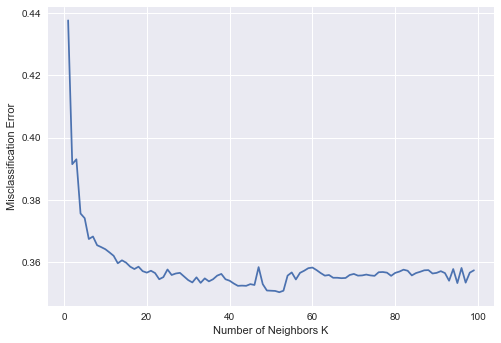

In [112]:
neighbors = range(1,100)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
#for k in neighbors:
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X2,y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [156]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc_scores = cross_val_score(svc,z, y_train.values.ravel(), cv=10, scoring='accuracy')
print('The accuracy of the SVM classifier with 10 fold cross-validation is ' + str(svc_scores.mean()))

The accuracy of the SVM classifier with 10 fold cross-validation is 0.727460442556


In [355]:
svc_2=SVC(kernel='rbf',gamma =0.05,C = 10)
svc2_scores = cross_val_score(svc,z, y_train.values.ravel(), cv=10, scoring='accuracy')
print('The accuracy of the SVM classifier with 10 fold cross-validation is ' + str(svc2_scores.mean()))

The accuracy of the SVM classifier with 10 fold cross-validation is 0.726293285403


In [120]:
# K-fold cross validation
# preparing the K-fold parameters
from sklearn import cross_validation
from sklearn.cross_validation import KFold, cross_val_score

Kfold = KFold(len(X_train),n_folds = 10,shuffle = True)
#print("K-fold Cross Val score using SVM is:  %s" %cross_val_score(SVC(),X,y,cv=Kfold).mean())

In [354]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import time
start_time = time.time()
parameters = [{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 2, 10]},
              {'kernel': ['rbf'],
               'gamma': [0.005, 0.05, 0.5, 5],
                'C': [0.001, 0.01, 0.5, 1, 10]}]

opt_classifier = GridSearchCV(SVC(), parameters, cv = Kfold)
opt_classifier.fit(z, y_train.values.ravel())

print("Best set of parameters found:")
print(opt_classifier.best_params_)
print()
print("Scores on training set:")
means = opt_classifier.cv_results_['mean_test_score']
stds = opt_classifier.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, opt_classifier.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best set of parameters found:
{'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}

Scores on training set:
0.627 (+/-0.033) for {'C': 0.001, 'kernel': 'linear'}
0.640 (+/-0.035) for {'C': 0.01, 'kernel': 'linear'}
0.724 (+/-0.037) for {'C': 0.1, 'kernel': 'linear'}
0.729 (+/-0.029) for {'C': 1, 'kernel': 'linear'}
0.718 (+/-0.030) for {'C': 2, 'kernel': 'linear'}
0.686 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.627 (+/-0.033) for {'C': 0.001, 'gamma': 0.005, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.001, 'gamma': 0.05, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.001, 'gamma': 0.5, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.001, 'gamma': 5, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.01, 'gamma': 0.005, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.01, 'gamma': 0.5, 'kernel': 'rbf'}
0.627 (+/-0.033) for {'C': 0.01, 'gamma': 5, 'kernel': 'rbf'}
0.628 (+/-0.033) for {'C': 0.5, 'gamma': 0.005, 'kernel': 'rbf'}
0.674 (+/-